<a href="https://colab.research.google.com/github/Otgonbtr/Dive_into_code/blob/main/Fuji_Shimoyama_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np

csv_path = "mtfuji_data.csv" # Specify the file name (path)

np.set_printoptions(suppress=True) # Set prohibition of scientific notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

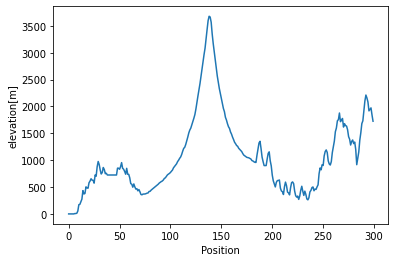

In [4]:
####### Problem 1: Data visualization ########
import matplotlib.pyplot as plt

position = fuji[:,0] 
elevation = fuji[:,3]
 
fig , ax = plt.subplots()
ax.plot(position,elevation)
ax.set_xlabel('Position')
ax.set_ylabel('elevation[m]')
plt.show()

In [35]:
########## Problem 2 ############
#Create a function to calculate the gradient at a certain point
def fuji_gradient(position, elevation,current_point):
  '''
  Calculate the gradient using the amount of change.
  parametres
  -------------
  definition x1,x2,y1,y2
  calculate amount of change in y
  calculate amount of change in x

  return
  --------------
  gradient
  '''
  x1 = position[current_point]
  x2 = position[current_point-1]
  y1 = elevation[current_point]
  y2 = elevation[current_point-1]

  y_change = y1-y2
  x_change = x1-x2

  gradient = y_change/x_change

  return gradient

In [33]:
########### Problem 3 ############
# Create a function to calculate the destination point
def destination_point(current_point,slope_current_point, Alpha=0.2):
  '''
  calculate the destination point
  destination_point = current_point - 'Alpha' * the slope of the current point
  return: int
  -----------
  destination_point
  '''
  destination_point = int(current_point - (Alpha*slope_current_point))

  return destination_point

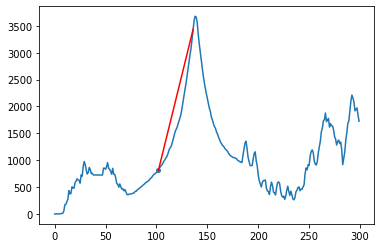

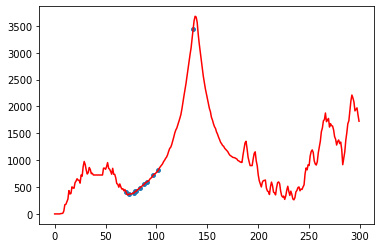

[3434.59, 817.62, 725.72, 602.36, 553.64, 488.4, 420.6, 418.41, 368.91, 412.27, 390.14]
[136, 102, 97, 91, 88, 84, 80, 79, 73, 70, 78]


In [37]:
############ Problem 4, 5 #################
# Create a function to go down the mountain
# Visualization of the descent process

def compute_path(elevation, current_point, position, alpha=0.2):
    '''
    Calculate go down the mountain
    Parameters
    -------------------------------
    current_position: int
       current_position
     learning_rate: floating point
        descending changes
     Returns
     --------------------------------
     destination_point: int
        calculated destination point
    '''
    grad = elevation[current_point]-elevation[current_point-1]
    update_y = [elevation[current_point]]
    update_point = [current_point]
    fig, ax = plt.subplots()
    ax.plot(position, elevation)

    while grad > 0:
        grad = fuji_gradient(position, elevation, current_point)
        current_point = destination_point(current_point,grad,alpha)

        update_y.append(elevation[current_point])
        update_point.append(current_point)  

        ax.scatter(current_point, elevation[current_point], s=15)
        ax.plot([update_point[-1],update_point[-2]], [update_y[-1],update_y[-2]], color = 'red')
        plt.pause(1)
        plt.show()
    return update_y, update_point

path = []
path_index = []
current_point = int(position[136])
alpha = 0.2

path, path_index = compute_path(elevation, current_point, position, alpha)
fig, ax = plt.subplots()
ax.plot(position, elevation, color='red')
ax.scatter(path_index, path, s=15)
plt.show()



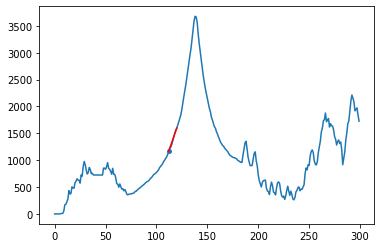

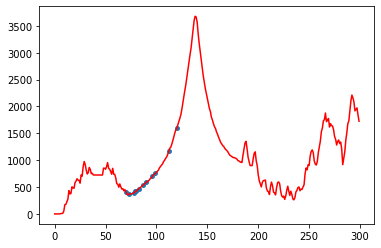

In [40]:
####### Problem 6 , 7 ###########
# Current location change
path = []
path_index = []
current_point = int(position[120])
alpha = 0.2

path, path_index = compute_path(elevation, current_point, position, alpha)
fig, ax = plt.subplots()
ax.plot(position, elevation, color='red')
ax.scatter(path_index, path, s=15)
plt.show()

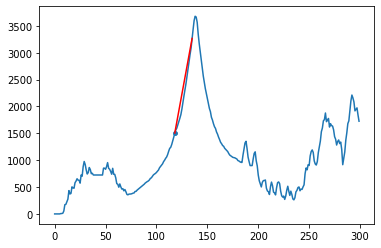

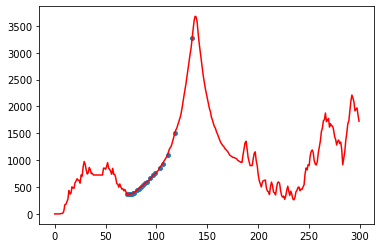

In [44]:
######## Problem 8 ###########
# Hyperparameter Changes
path = []
path_index = []
current_point = int(position[135])
alpha = 0.09

path, path_index = compute_path(elevation, current_point, position, alpha)
fig, ax = plt.subplots()
ax.plot(position, elevation, color='red')
ax.scatter(path_index, path, s=15)
plt.show()